<a href="https://colab.research.google.com/github/Strata-Tech/Covid19_contact_tracing/blob/main/Covid19_contact_tracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN


In [3]:
#loading of dataset of individuals(infected/potentially to beinfected) visited location. 
#Can be assessed via information on TraceTogether App which Singapore uses.

df = pd.read_json('/content/drive/MyDrive/PCMLdata/contact.json')
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


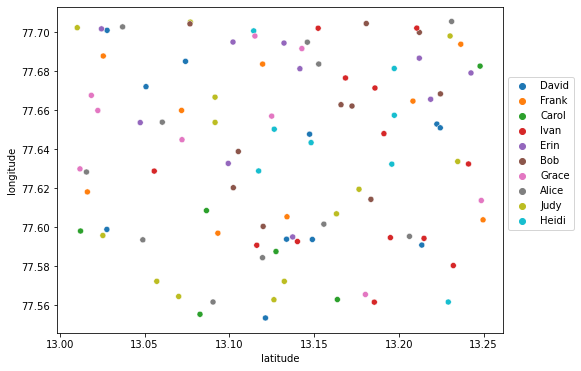

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()


In [41]:
#function will generate clusters, which will help identify infections by filtering the data in the clusters:

def get_infected_names(input_name):

  epsilon = 0.01 
  model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
  df['cluster'] = model.labels_.tolist()

  input_name_clusters = []
  for i in range(len(df)):
      if df['id'][i] == input_name:
          if df['cluster'][i] in input_name_clusters:

            pass
          else:

            input_name_clusters.append(df['cluster'][i])
    
  infected_names = []
  for cluster in input_name_clusters:

    if cluster != -1:

      ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
      for i in range(len(ids_in_cluster)):

        member_id = ids_in_cluster.iloc[i]
        if (member_id not in infected_names) and (member_id != input_name):

          infected_names.append(member_id)
        else:
            pass
  return infected_names

In [50]:
model = DBSCAN(eps=0.01, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()
df['cluster'].values

array([ 0,  1,  2, -1, -1, -1,  3,  4,  5, -1,  6,  7,  8,  9, -1,  5, 10,
       11, -1, -1, -1, 12, -1, -1, 13, -1, -1, 14, 15, 16,  4, -1, 17,  0,
       -1,  2,  4,  4, 13, -1, -1,  0, 18, 19, -1, 20, 21, 17,  3,  0, 10,
        0, -1, -1, -1, 15,  7,  8, -1, -1, -1, 22, 23,  0,  6,  2, 18, -1,
       -1, 21, 18, 24, 24,  9, 11, -1, 14, -1, -1,  0, -1, -1,  0, 21, -1,
       12, -1,  0,  0, 20, -1, -1, 16,  0,  1, 23, 19, 22, -1,  8])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


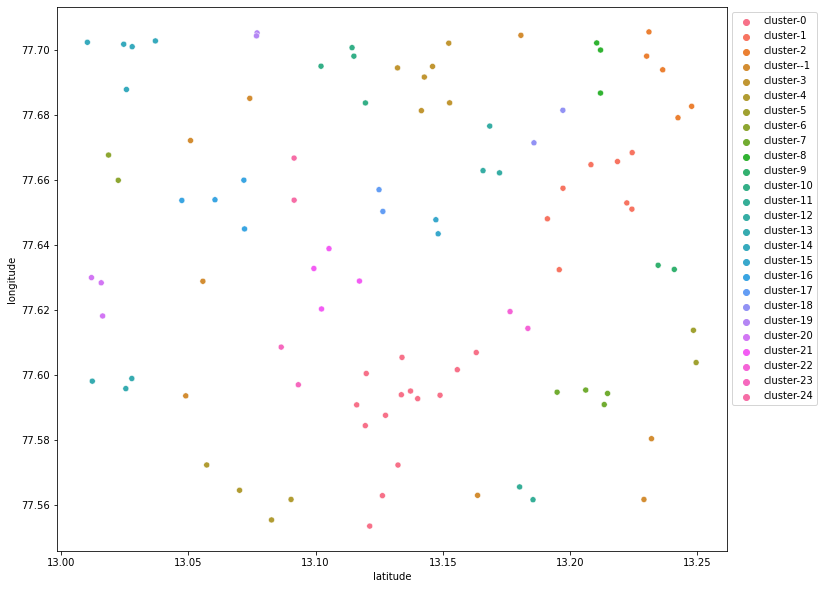

In [48]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [49]:
print(get_infected_names("Ivan"))

['Judy', 'David', 'Alice', 'Carol', 'Erin', 'Bob', 'Frank', 'Grace', 'Heidi']
